# 📘 Impedance and Phase Plot from DATS Export

This notebook reads a text file exported from the Dayton Audio Test System (DATS) and plots impedance and phase versus frequency. 
The impedance is plotted on the left Y-axis, and the phase (dotted line) is plotted on the right Y-axis.

In [2]:
# Import required libraries
import matplotlib.pyplot as plt

In [3]:
# Define the file path
file_path = 'hapticoupler_transducer.txt'

# Prepare lists for frequency, impedance, and phase
frequencies = []
impedances = []
phases = []

# Flag to detect the start of data section
data_section = False

# Read and parse the data
with open(file_path, 'r') as file:
    for line in file:
        if line.strip().startswith("Freq"):
            data_section = True
            continue
        if data_section:
            try:
                parts = line.strip().split()
                if len(parts) >= 3:
                    frequencies.append(float(parts[0]))
                    impedances.append(float(parts[1]))
                    phases.append(float(parts[2]))
            except ValueError:
                continue  # Skip lines that don't convert cleanly

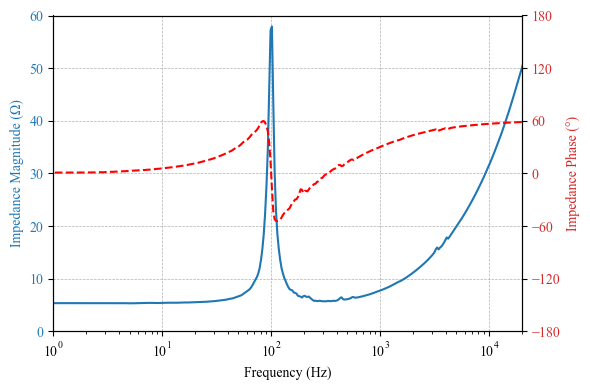

In [4]:
import matplotlib as mpl

#set Times New Roman as the default font
mpl.rcParams['font.family'] = 'Times New Roman'

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot impedance
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Impedance Magnitude (Ω)', color='tab:blue')
ax1.set_xscale('log')  # Set x-axis to logarithmic scale
ax1.plot(frequencies, impedances, color='tab:blue', label='Impedance')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.yaxis.set_major_locator(plt.MaxNLocator(6))
ax1.set_ylim([0,60])
ax1.set_xlim([1,20000])

plt.grid(True, which='major',axis='both', linestyle='--', linewidth=0.5)


# Plot phase on secondary axis
ax2 = ax1.twinx()
ax2.set_ylabel('Impedance Phase (°)', color='tab:red')
ax2.plot(frequencies, phases, 'r--', label='Phase')  # Dotted red line
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.yaxis.set_major_locator(plt.MaxNLocator(6))
ax2.set_ylim([-180,180])


# Add grid and title
#plt.title('Impedance and Phase vs Frequency')
fig.tight_layout()



# Save the figure as EPS
plt.savefig('outputs/impedance_phase_plot.eps', format='eps')

plt.show()